# Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model

# Data Collection

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data Annotation

In [3]:
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Data Preprocessing

Data Cleaning

 - No missing values in Fashion MNIST.

Data Normalization

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Train-Test Split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)

Feature Extraction

 - Done automatically by CNN layers.

Dimensionality Reduction

In [6]:
X_train = np.expand_dims(X_train, -1)
X_val   = np.expand_dims(X_val, -1)
X_test  = np.expand_dims(X_test, -1)

#  Image Augmentation

In [7]:
# Define ImageDataGenerator for training data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on training data
datagen.fit(X_train)

# **Callbacks Definitions**

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5,  patience=3, min_lr=1e-6, verbose=1)

# **Model Selection**

## Base CNN Model

In [9]:
cnn_model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu', padding='same', strides=(2,2)),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

## Compile With Base CNN

In [10]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Training With Base CNN

In [11]:
cnn_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 2s 11ms/step - loss: 1.0102 - accuracy: 0.6317 - val_loss: 0.5789 - val_accuracy: 0.7754
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.5482 - accuracy: 0.7955 - val_loss: 0.4683 - val_accuracy: 0.8280
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4583 - accuracy: 0.8333 - val_loss: 0.3935 - val_accuracy: 0.8560
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3938 - accuracy: 0.8573 - val_loss: 0.3589 - val_accuracy: 0.8718
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3582 - accuracy: 0.8718 - val_loss: 0.3243 - val_accuracy: 0.8814
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3336 - accuracy: 0.8781 - val_loss: 0.3133 - val_accuracy: 0.8847
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3147 - accuracy: 0.8849 - val_loss: 0.3146 - val_accuracy: 0.8868
Epoch 8/20
94/94 [=

## Model Evaluation With Base CNN

In [12]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2744 - accuracy: 0.9011


[0.2744142413139343, 0.9010999798774719]

## Hyperparameter Tuning

In [13]:
# Rebuild CNN model with updated hyperparameters
tuned_model = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(28,28,1)),  # Increased filters
    MaxPooling2D(2),
    Conv2D(128, 3, activation='relu', padding='same', strides=(2,2)), # More filters
    MaxPooling2D(2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),                     # Higher dropout rate
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

tuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

# Compile with tuned learning rate

In [14]:
tuned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the tuned model tuning with Callbacks

In [15]:
tuned_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=256,        # Batch size is a tunable hyperparameter
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
188/188 [==============================] - 3s 12ms/step - loss: 0.7732 - accuracy: 0.7118 - val_loss: 0.4551 - val_accuracy: 0.8296 - lr: 0.0010
Epoch 2/30
188/188 [==============================] - 2s 10ms/step - loss: 0.4272 - accuracy: 0.8431 - val_loss: 0.3810 - val_accuracy: 0.8593 - lr: 0.0010
Epoch 3/30
188/188 [==============================] - 2s 10ms/step - loss: 0.3541 - accuracy: 0.8704 - val_loss: 0.3369 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 4/30
188/188 [==============================] - 2s 10ms/step - loss: 0.3163 - accuracy: 0.8846 - val_loss: 0.2944 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 5/30
188/188 [==============================] - 2s 10ms/step - loss: 0.2847 - accuracy: 0.8957 - val_loss: 0.2757 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 6/30
188/188 [==============================] - 2s 10ms/step - loss: 0.2578 - accuracy: 0.9047 - val_loss: 0.3041 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 7/30
188/188 [==============================] - 2s 10ms/st

## Model Evaluation Tuning

In [16]:
tuned_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9059


[0.26697027683258057, 0.9059000015258789]

# Model Optimization

In [17]:
# Define L2 regularization strength
l2_reg = 0.001

# Optimized CNN Model
optimized_model = Sequential([
    # Convolutional Block 1
    Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(2),

    # Convolutional Block 2
    Conv2D(128, 3, activation='relu', padding='same', strides=(2,2), kernel_regularizer=regularizers.l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(2),

    # Convolutional Block 3
    Conv2D(64, 3, activation='relu', padding='same', strides=(1,1), kernel_regularizer=regularizers.l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(2),
    
    Flatten(),

    # Dense Block 1
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),

    # Dense Block 2
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.4),

    # Dense Block 3
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.25),

    # Dense Block 4
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    BatchNormalization(),

    # Output
    Dense(10, activation='softmax')
])

## Compile With Optimization 

In [18]:
optimized_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Model With Optimization

In [19]:
# Fit the model using data generator
history = optimized_model.fit(
    datagen.flow(X_train, y_train, batch_size=512),
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/40
94/94 [==============================] - 9s 82ms/step - loss: 2.1758 - accuracy: 0.6055 - val_loss: 4.2220 - val_accuracy: 0.1008 - lr: 0.0010
Epoch 2/40
94/94 [==============================] - 7s 79ms/step - loss: 1.6254 - accuracy: 0.7479 - val_loss: 4.6318 - val_accuracy: 0.1331 - lr: 0.0010
Epoch 3/40
94/94 [==============================] - 7s 77ms/step - loss: 1.3873 - accuracy: 0.7812 - val_loss: 4.1633 - val_accuracy: 0.1430 - lr: 0.0010
Epoch 4/40
94/94 [==============================] - 7s 77ms/step - loss: 1.1973 - accuracy: 0.8029 - val_loss: 3.0457 - val_accuracy: 0.2255 - lr: 0.0010
Epoch 5/40
94/94 [==============================] - 7s 78ms/step - loss: 1.0357 - accuracy: 0.8187 - val_loss: 2.0358 - val_accuracy: 0.3661 - lr: 0.0010
Epoch 6/40
94/94 [==============================] - 7s 77ms/step - loss: 0.9181 - accuracy: 0.8295 - val_loss: 1.1064 - val_accuracy: 0.7106 - lr: 0.0010
Epoch 7/40
94/94 [==============================] - 8s 80ms/step - loss: 0.8

## Model Evaluation With Optimization

In [20]:
optimized_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3764 - accuracy: 0.8876


[0.3763890266418457, 0.8876000046730042]

# **Visualization and Evaluation**

## Plot Training and Validation Accuracy & Loss

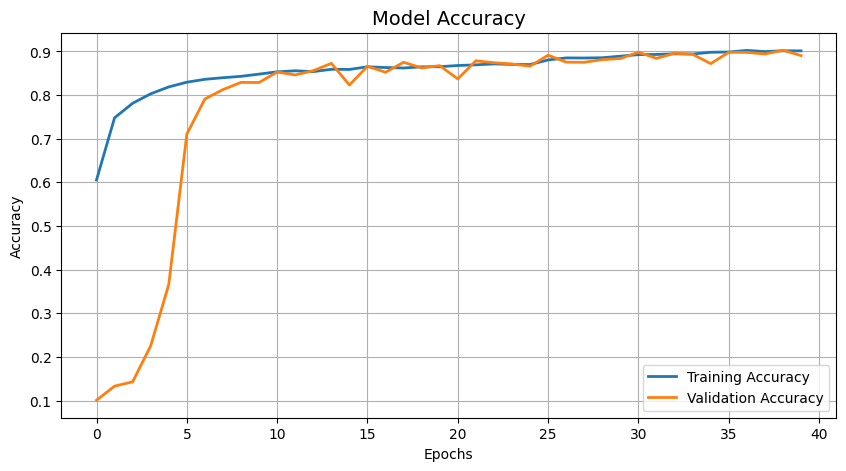

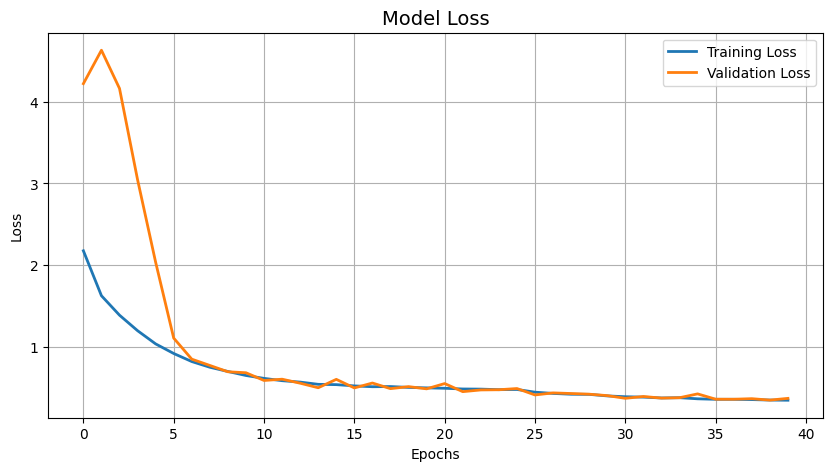

In [21]:
# Accuracy plot
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluation

Display Sample Predictions

1/1 [==============================] - 0s 6ms/step


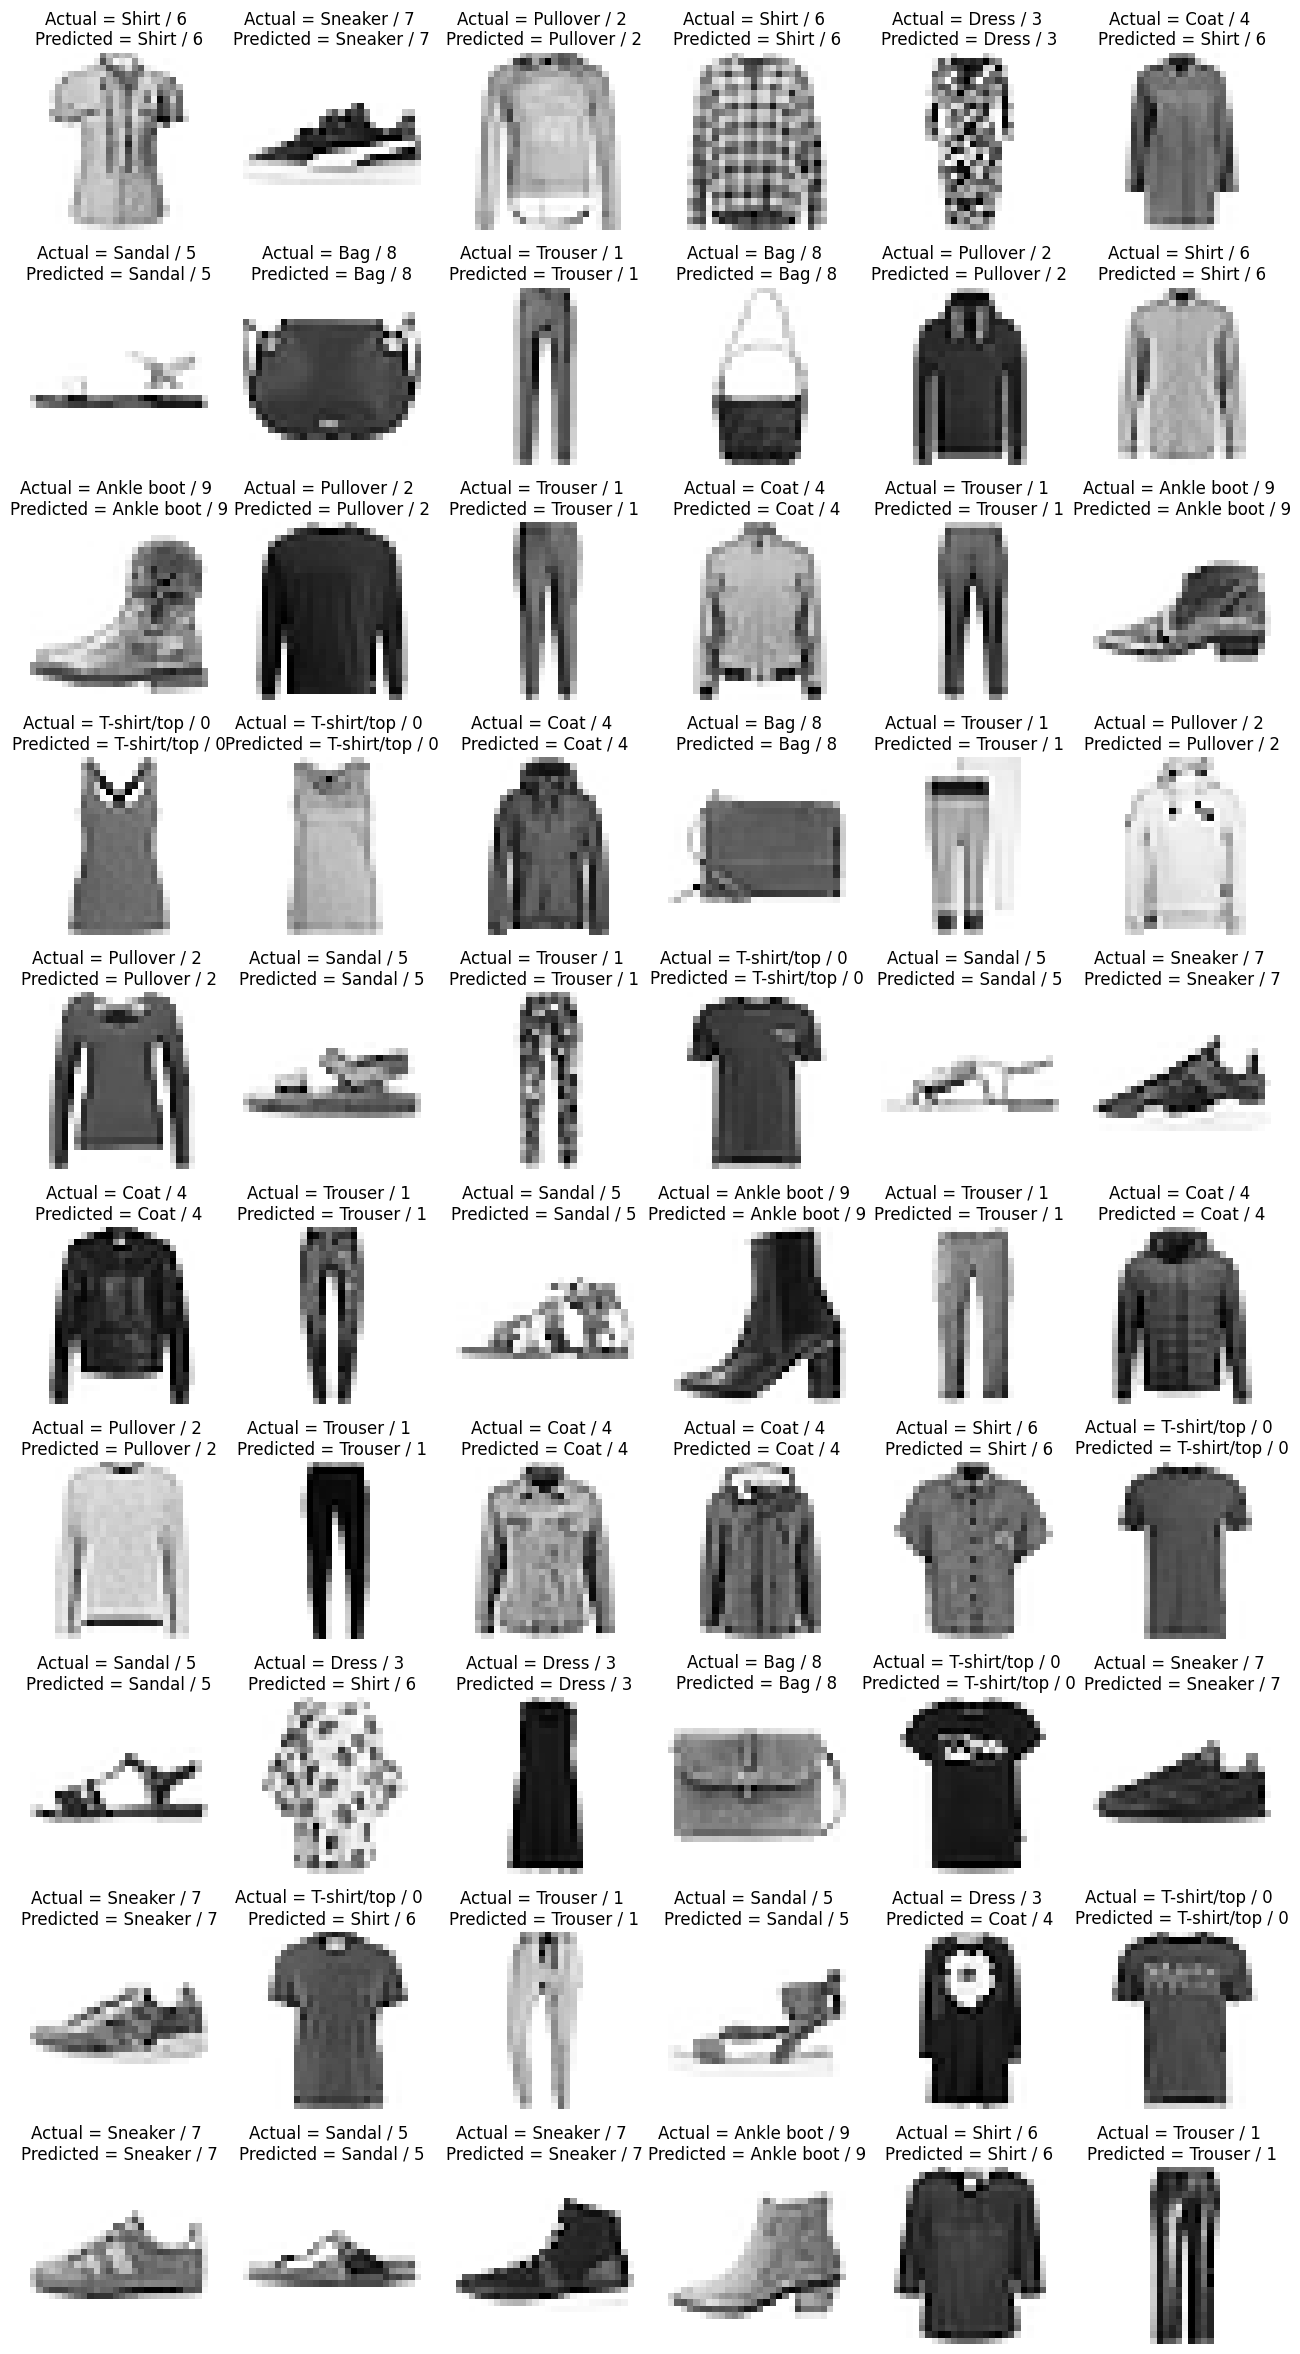

In [30]:
plt.figure(figsize=(16, 30))
j = 1
for i in np.random.randint(0, 1000, 60):
    plt.subplot(10, 6, j); j += 1
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(
        class_labels[y_test[i]], y_test[i],
        class_labels[np.argmax(optimized_model.predict(np.expand_dims(X_test[i], axis=0)))],
        np.argmax(optimized_model.predict(np.expand_dims(X_test[i], axis=0)))
    ))
    plt.axis('off')

Predict Labels from Model

In [23]:
# Predict on test set
y_pred = optimized_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


Confusion Matrix

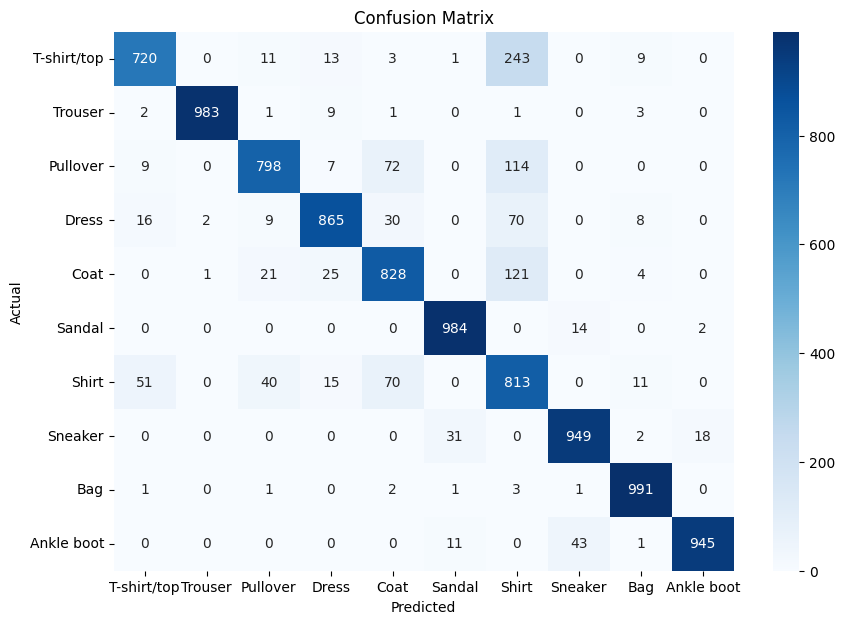

In [24]:
# Confusion confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [25]:
print(classification_report(y_test, y_pred_classes, target_names=class_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.72      0.80      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.80      0.85      1000
       Dress       0.93      0.86      0.89      1000
        Coat       0.82      0.83      0.83      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.60      0.81      0.69      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.96      0.99      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



Accuracy Score

In [26]:
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy Score: {test_accuracy * 100:.2f}%")

Test Accuracy Score: 88.76%


# **Model Deployment**

Save the Entire Model (Recommended for deployment)

In [27]:
optimized_model.save('fashion_mnist_cnn_optimized_model(2).h5')

Load the Saved Model

In [28]:
# Load the trained model
loaded_model = load_model('fashion_mnist_cnn_optimized_model(2).h5')

# Predict on a single sample
sample = np.expand_dims(X_test[0], axis=0)
prediction = loaded_model.predict(sample)

print("Predicted Label:", np.argmax(prediction))
print("Actual Label:", y_test[0])

1/1 [==============================] - 0s 116ms/step
Predicted Label: 9
Actual Label: 9
